In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,r2_score
plt.style.use ("ggplot")


In [2]:
#process data

In [3]:
df = pd.read_csv(r'heart.csv') #getting from keggal database 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.isna().sum() # to check if we have any null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df = df.drop_duplicates()  #to drop all duplicates 

In [7]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
df.nunique() # to let us know how many differet kind of information we have in each column

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
df.corr() # the correlation between the attributes

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


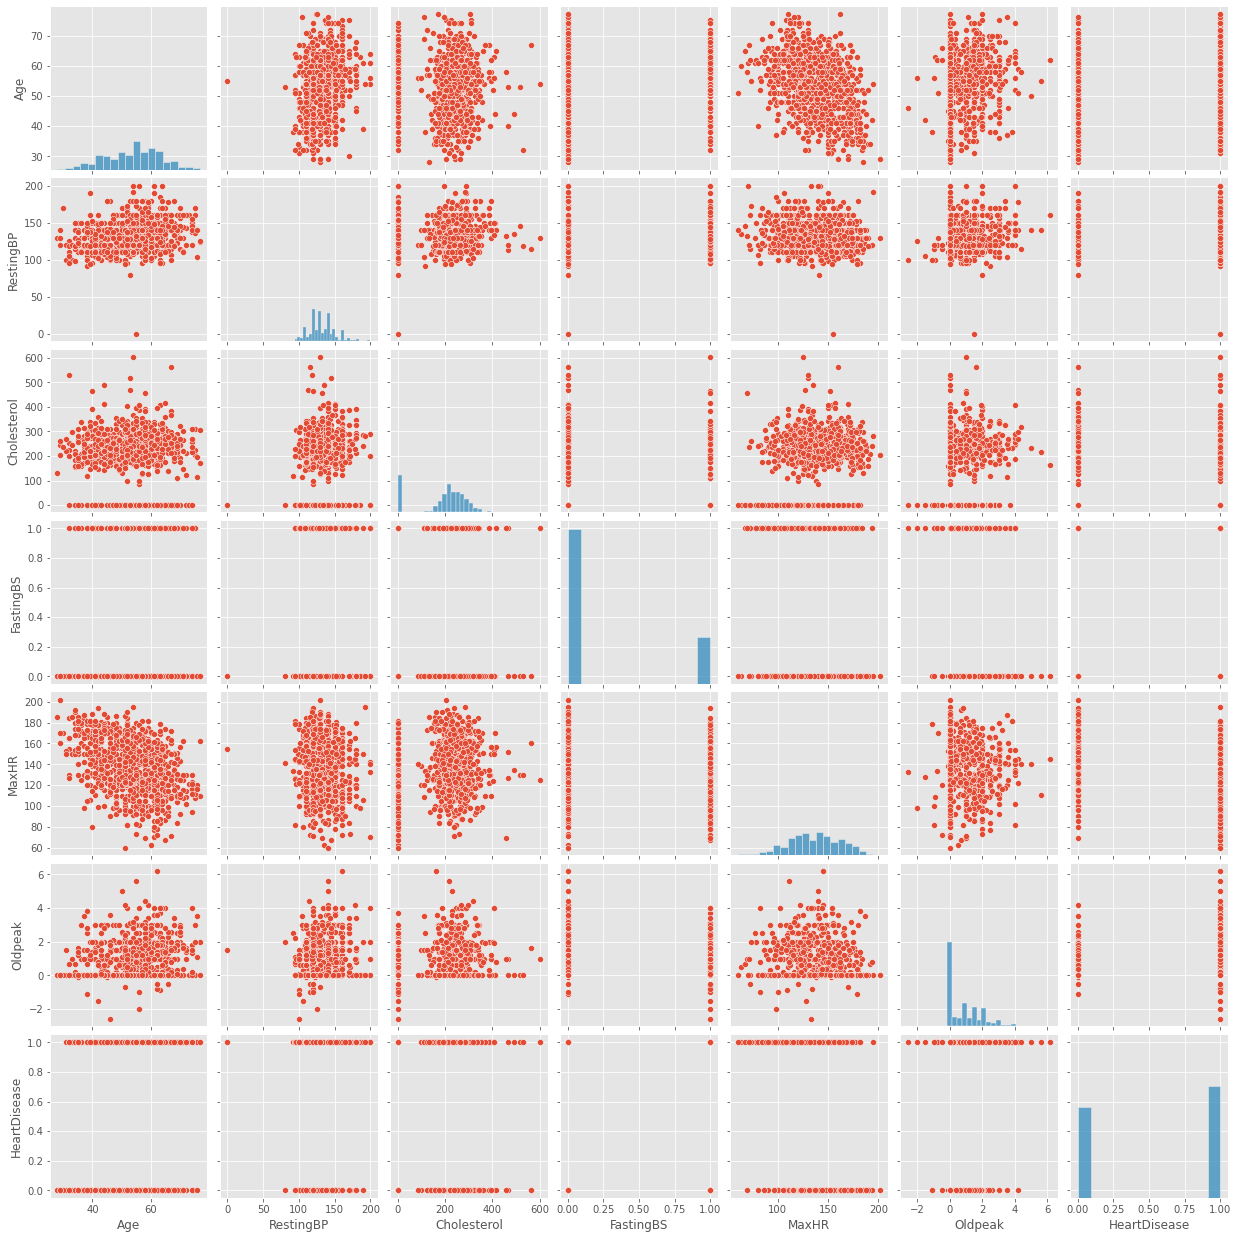

In [10]:
sn.pairplot(df) # correlation illustration

In [11]:
df.info() #an overview to our data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 125.5+ KB


/Users/usamaal-attia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

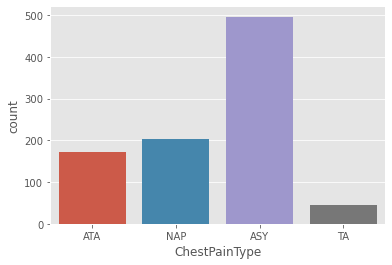

In [12]:
sn.countplot(df['ChestPainType'])

/Users/usamaal-attia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

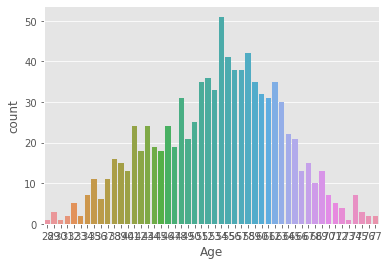

In [13]:
sn.countplot(df['Age'])

/Users/usamaal-attia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

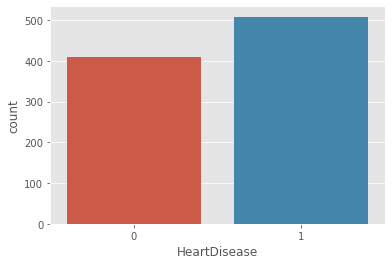

In [14]:
sn.countplot(df['HeartDisease'])

/Users/usamaal-attia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

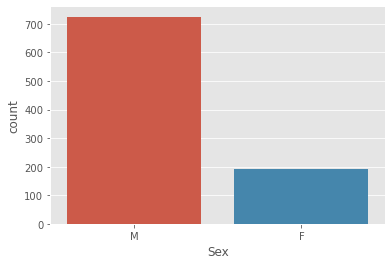

In [15]:
sn.countplot(df['Sex'])

In [16]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

/Users/usamaal-attia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

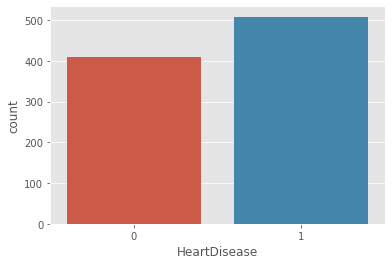

In [17]:
sn.countplot(df['HeartDisease'])

In [18]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [19]:
df['Sex']

0      M
1      F
2      M
3      F
4      M
      ..
913    M
914    M
915    M
916    F
917    M
Name: Sex, Length: 918, dtype: object

In [20]:
#convert object types into numercal values 

In [21]:
df.Sex = df.Sex.map( {'M':0 , 'F':1} )

In [22]:
df.Sex

0      0
1      1
2      0
3      1
4      0
      ..
913    0
914    0
915    0
916    1
917    0
Name: Sex, Length: 918, dtype: int64

In [23]:
df.ChestPainType = df.ChestPainType.map( {'TA':0 , 'ATA':1, 'NAP':2, 'ASY':3} )

In [24]:
df.RestingECG = df.RestingECG.map( {'Normal':0 , 'ST':1, 'LVH':2} )

In [25]:
df.ExerciseAngina = df.ExerciseAngina.map( {'N':0 , 'Y':1} )

In [26]:
df.ST_Slope = df.ST_Slope.map( {'Up':1 , 'Flat':0, 'Down':-1} )

In [27]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,2.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.361656,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,-1.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,0.000000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000,1.000000


<AxesSubplot:>

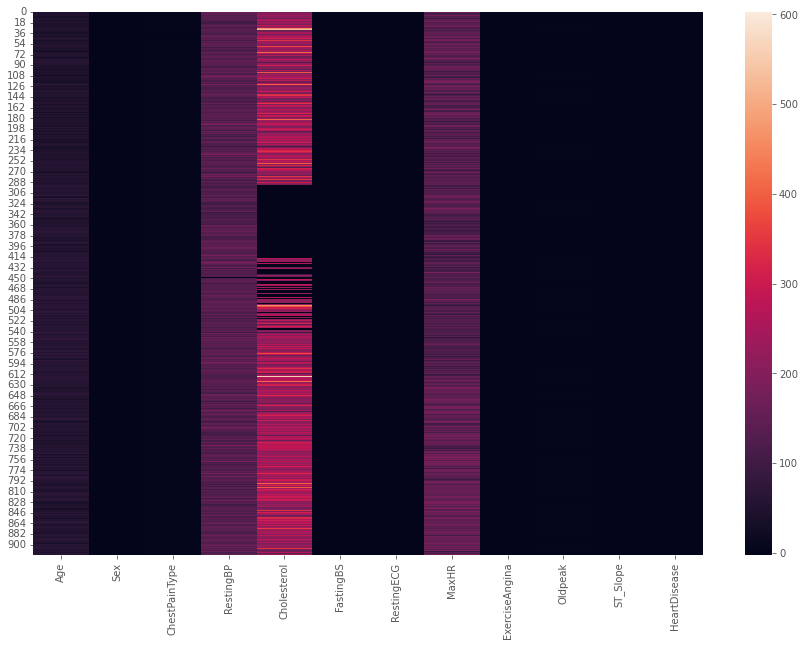

In [28]:
plt.figure(figsize=(15, 10))
sn.heatmap(df)

In [29]:
# Support vector machine

In [30]:
x = df.iloc[:,:-1].values #getting our data from the dataframe
x

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  0. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  0. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  0. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  1. ]])

In [31]:
y = df.iloc[:,-1].values
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [32]:
SC = StandardScaler() #standarise the values to work in unsupervised method
x[:,0:] = SC.fit_transform(x[:,0:])
x[:,0:]

array([[-1.4331398 , -0.51595242, -1.34508565, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359,  1.93816322, -0.27042192, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854, -0.51595242, -1.34508565, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972, -0.51595242,  0.80424181, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972,  1.93816322, -1.34508565, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563, -0.51595242, -0.27042192, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [33]:
#defining our new data frame after standarising and show our new heatmap
df = pd.DataFrame(x,columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
#plt.figure(figsize=(20, 10))
#sn.heatmap(df)

In [34]:
X = df.values
X 

array([[-1.4331398 , -0.51595242, -1.34508565, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359,  1.93816322, -0.27042192, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854, -0.51595242, -1.34508565, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972, -0.51595242,  0.80424181, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972,  1.93816322, -1.34508565, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563, -0.51595242, -0.27042192, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [35]:
x_train,x_test,y_train,y_test = train_test_split (X ,y ,test_size = 0.3 ,random_state = 0) #splitting the data

In [83]:
svc = SVC(kernel ='rbf') 
svc.fit(x_train, y_train) # fitting data into the support vec machine
y_pred = svc.predict(x_test)
print(y_pred)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


In [84]:
#evaluation 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) 

0.8695652173913043

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.78       113
           1       0.83      0.89      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.81      0.82       276
weighted avg       0.83      0.83      0.82       276



[[ 83  30]
 [ 18 145]]


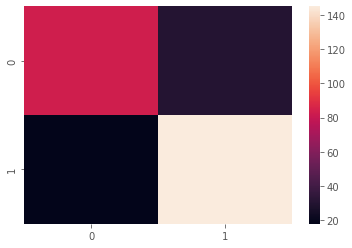

In [39]:
#confusion matrix of FF, FT, TF, TT as a matrix and a heatmap
CM = confusion_matrix (y_test,y_pred)
sn.heatmap(CM)
print (CM)

In [40]:
#illustartion to the actual and predicted values
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

,Actual,Predict
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,1,1
273,1,1
274,1,1


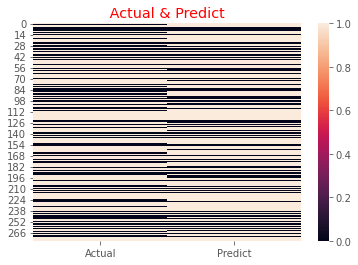

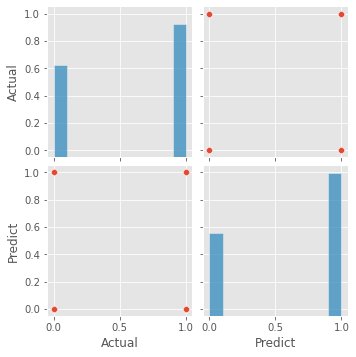

In [41]:
plt.title (' Actual & Predict ',color = 'r')
sn.heatmap(df_comp)
sn.pairplot(df_comp)

In [42]:
#random forest 

In [87]:
RFC=RandomForestClassifier(n_estimators=10,random_state=0)
RFC.fit(x_train,y_train)
y_pred_2 = RFC.predict(x_test)
y_pred_2

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [107]:
!pip install pydotplus
!pip install graphviz


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 5.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [109]:

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Create a RandomForestClassifier object
RFC = RandomForestClassifier(n_estimators=10, random_state=0)

# Fit the model to the training data
RFC.fit(x_train, y_train)

# Predict the labels for the test data
y_pred_2 = RFC.predict(x_test)

# Extract a single decision tree from the forest
tree = RFC.estimators_[0]

# Export the tree to a DOT format
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)

# Convert the DOT data to an image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [110]:
accuracy_score(y_test, y_pred_2)

0.855072463768116

In [111]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       113
           1       0.90      0.85      0.87       163

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



[[ 97  16]
 [ 24 139]]


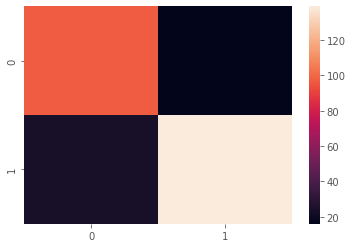

In [112]:
CM = confusion_matrix (y_test,y_pred_2)
sn.heatmap(CM)
print (CM)

In [113]:
df_comp_2 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_2})
df_comp_2

,Actual,Predict
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,1,1
273,1,1
274,1,1


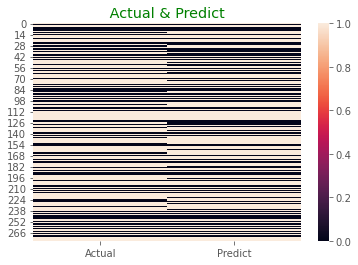

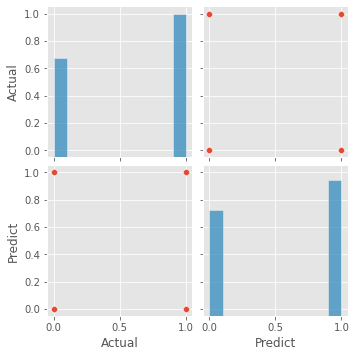

In [114]:
plt.title (' Actual & Predict ',color = 'g')
sn.heatmap(df_comp_2)
sn.pairplot(df_comp_2)

In [115]:
#knn

In [116]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
y_pred_3  = neigh.predict(x_test)
y_pred_3

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [117]:
accuracy_score(y_test, y_pred_3)

0.894927536231884

In [118]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       113
           1       0.91      0.91      0.91       163

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



[[ 98  15]
 [ 14 149]]


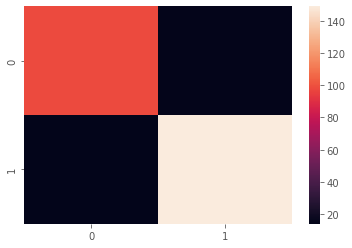

In [119]:
CM = confusion_matrix (y_test,y_pred_3)
sn.heatmap(CM)
print (CM)

In [120]:
df_comp_3 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_3})
df_comp_3

,Actual,Predict
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,1,1
273,1,1
274,1,1


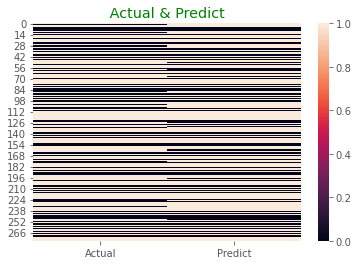

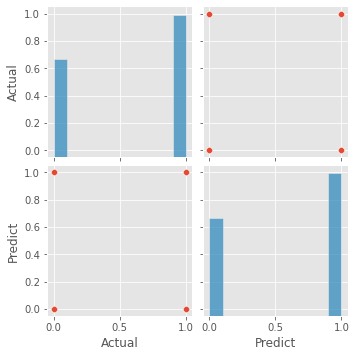

In [121]:
plt.title (' Actual & Predict ',color = 'g')
sn.heatmap(df_comp_3)
sn.pairplot(df_comp_3)

In [122]:
#k-mean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,0.0,0.333333,0.70,0.479270,0.0,0.0,0.788732,0.0,0.295455,1.0
1,0.428571,1.0,0.666667,0.80,0.298507,0.0,0.0,0.676056,0.0,0.409091,0.5
2,0.183673,0.0,0.333333,0.65,0.469320,0.0,0.5,0.267606,0.0,0.295455,1.0
3,0.408163,1.0,1.000000,0.69,0.354892,0.0,0.0,0.338028,1.0,0.465909,0.5
4,0.530612,0.0,0.666667,0.75,0.323383,0.0,0.0,0.436620,0.0,0.295455,1.0


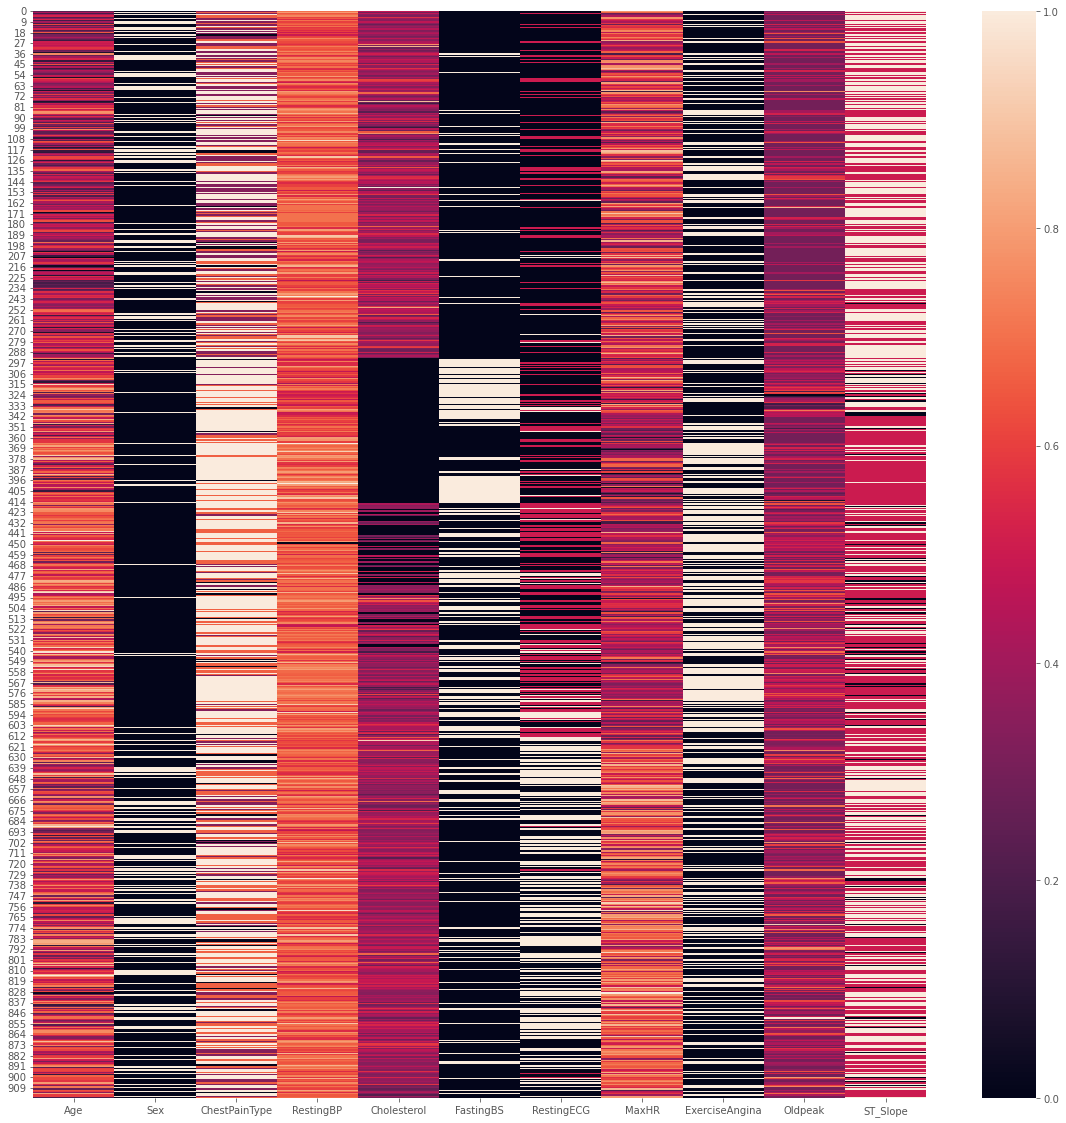

In [123]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(X, y)
df_scale = pd.DataFrame(scale, columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
plt.figure(figsize=(20, 20))
sn.heatmap(df_scale)
df_scale.head(5)

In [124]:
km=KMeans(n_clusters=2)
y_pred_4 = km.fit_predict(x_test)
y_pred_4

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int32)

In [125]:
accuracy_score(y_test, y_pred_4)

0.8405797101449275

In [126]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       113
           1       0.87      0.85      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



[[ 93  20]
 [ 24 139]]


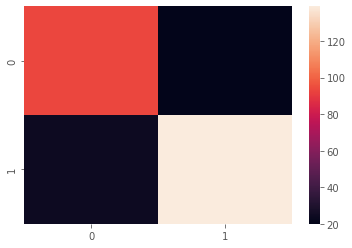

In [127]:
CM = confusion_matrix (y_test,y_pred_4)
sn.heatmap(CM)
print (CM)

In [128]:
km.cluster_centers_

array([[-0.53197335,  0.5118396 , -0.58271736, -0.17570272,  0.34965684,
        -0.18747984,  0.03599225,  0.60032319, -0.77130495, -0.52935525,
         0.62950049],
       [ 0.35742434, -0.37704021,  0.55416283,  0.03091425, -0.32446985,
         0.3262743 ,  0.02378024, -0.51302419,  0.53497862,  0.38119233,
        -0.47168628]])

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int32)

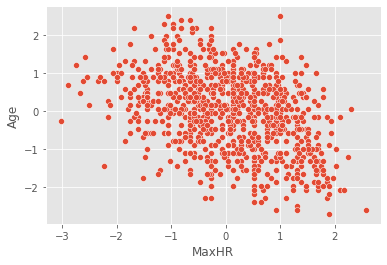

In [129]:
a= km.labels_
sn.scatterplot(x="MaxHR", y= "Age",data=df)
a

<AxesSubplot:xlabel='Cholesterol', ylabel='Oldpeak'>

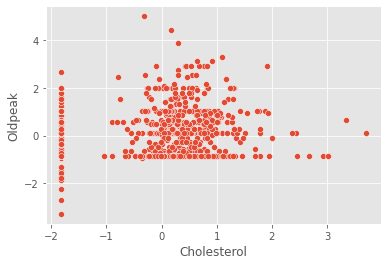

In [130]:
sn.scatterplot(x="Cholesterol", y= "Oldpeak",data=df)

In [131]:
scaler = MinMaxScaler()

In [132]:
df.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,-0.515952,-1.345086,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,1.938163,-0.270422,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,-0.515952,-1.345086,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,1.938163,0.804242,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,-0.596078


In [133]:
scale = scaler.fit_transform(df)

df_scale = pd.DataFrame(scale, columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
df_scale.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,0.0,0.333333,0.70,0.479270,0.0,0.0,0.788732,0.0,0.295455,1.0
1,0.428571,1.0,0.666667,0.80,0.298507,0.0,0.0,0.676056,0.0,0.409091,0.5
2,0.183673,0.0,0.333333,0.65,0.469320,0.0,0.5,0.267606,0.0,0.295455,1.0
3,0.408163,1.0,1.000000,0.69,0.354892,0.0,0.0,0.338028,1.0,0.465909,0.5
4,0.530612,0.0,0.666667,0.75,0.323383,0.0,0.0,0.436620,0.0,0.295455,1.0


In [134]:
#PCA

<AxesSubplot:>

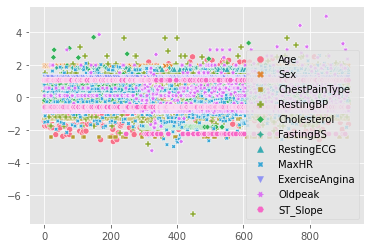

In [135]:
sn.scatterplot(data=df)

In [136]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # choosing 2 for better visualisation
principalComponents = pca.fit_transform(df_scale)
pca_df = pd.DataFrame(data = principalComponents, columns = ['component 1', 'component 2'])
pca_df.head()

,component 1,component 2
0,-0.644167,-0.079920
1,-0.624046,-0.285940
2,-0.533714,0.009604
3,0.297527,-0.686914
4,-0.440342,-0.052112


In [137]:
N = range(2,12)
w = []
for k in N:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_df)
    w_iter = kmeans.inertia_
    w.append(w_iter)

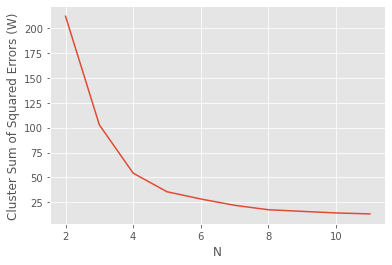

In [138]:
plt.xlabel('N')
plt.ylabel('Cluster Sum of Squared Errors (W)')
plt.plot(N,w)


In [139]:
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(pca_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(pca_df,labels,metric="euclidean",sample_size=1000,random_state=200)))


Silhouette score for k(clusters) = 2 is 0.5556695169173206
Silhouette score for k(clusters) = 3 is 0.6431525448795459
Silhouette score for k(clusters) = 4 is 0.6960099173936692
Silhouette score for k(clusters) = 5 is 0.5939007781570104
Silhouette score for k(clusters) = 6 is 0.5576469441147223
Silhouette score for k(clusters) = 7 is 0.564678112789578
Silhouette score for k(clusters) = 8 is 0.5531099166502511
Silhouette score for k(clusters) = 9 is 0.5229809959339167
Silhouette score for k(clusters) = 10 is 0.4663390824883456
Silhouette score for k(clusters) = 11 is 0.4329173837930513


In [147]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(principalComponents)

# To predict the cluster for a new data point

    

reduced_new_data_point = pca.transform(x_test)
y_pred_5 = kmeans.predict(reduced_new_data_point)
y_pred_5

/Users/usamaal-attia/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

In [148]:
accuracy_score(y_test, y_pred_5)

0.7210144927536232

<AxesSubplot:xlabel='component 1', ylabel='component 2'>

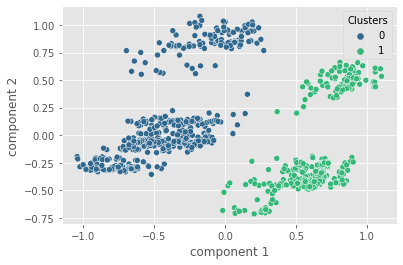

In [149]:
pca_df['Clusters'] = kmeans.labels_ #getting our output

sn.scatterplot(x="component 1", y="component 2",hue = 'Clusters',  data=pca_df,palette='viridis')

In [150]:

print(classification_report(y_test,y_pred_5))

              precision    recall  f1-score   support

           0       0.61      0.89      0.72       113
           1       0.89      0.60      0.72       163

    accuracy                           0.72       276
   macro avg       0.75      0.75      0.72       276
weighted avg       0.78      0.72      0.72       276



[[101  12]
 [ 65  98]]


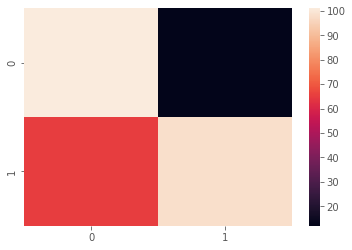

In [151]:
CM = confusion_matrix (y_test,y_pred_5)
sn.heatmap(CM)
print (CM)